## Test migration history reconstruction on Sanborn et. al. Melanoma data

In [1]:
import sys
import os

repo_dir = os.path.join(os.getcwd(), "../")

from metient.metient import *

import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = [3, 3]
SANBORN_DATA_DIR = os.path.join(repo_dir, 'data', 'sanborn_melanoma_2015')
TREE_DIR = os.path.join(SANBORN_DATA_DIR, 'orchard_trees')    
TSV_DIR = os.path.join(SANBORN_DATA_DIR, 'pyclone_clustered_tsvs')                 

OUTPUT_DIR = os.path.join(SANBORN_DATA_DIR, "metient_outputs")

COLORS = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

PATIENT_IDS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
print_config = PrintConfig(visualize=True, k_best_trees=6)


CUDA GPU: False


### Run all patients in calibrate mode

Saving results to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/sanborn_melanoma_2015/metient_outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/sanborn_melanoma_2015/metient_outputs/calibrate
Calibrating for patient: A_calibrate
Calculated batch size: 256


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:00<00:00, 159.36it/s]


# final solutions: 2
Calibrating for patient: B_calibrate
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 169.78it/s]


# final solutions: 4
Calibrating for patient: C_calibrate
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 77.39it/s]


# final solutions: 5
Calibrating for patient: D_calibrate
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 197.71it/s]


# final solutions: 2
Calibrating for patient: E_calibrate
Calculated batch size: 768
Restructuring adjacency matrix for E_calibrate_Primary, left heel since root node is not at index 0


100%|██████████| 75/75 [00:00<00:00, 109.37it/s]


# final solutions: 3
Calibrating for patient: F_calibrate
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 169.57it/s]


# final solutions: 3
Calibrating for patient: G_calibrate
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 159.20it/s]


# final solutions: 2
Calibrating for patient: H_calibrate
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 193.49it/s]


# final solutions: 3
Calibrating to 8 patients
Optimized thetas: tensor([0.5033, 0.2534, 0.2433], grad_fn=<DivBackward0>)
A_calibrate_Primary, forehead
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

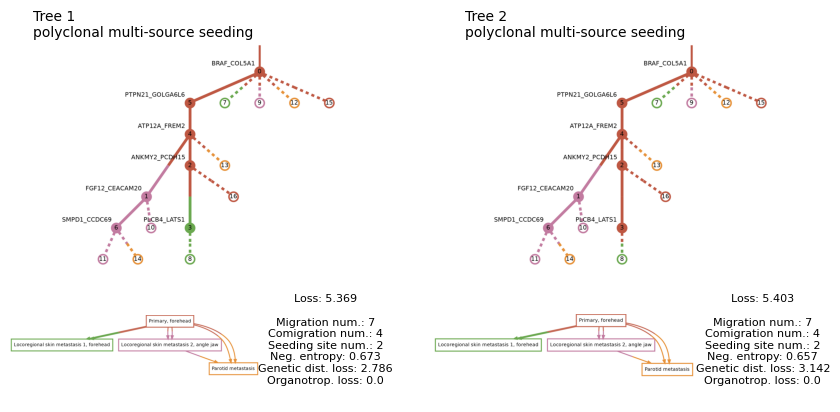

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)


B_calibrate_Primary, mid-left back
6 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

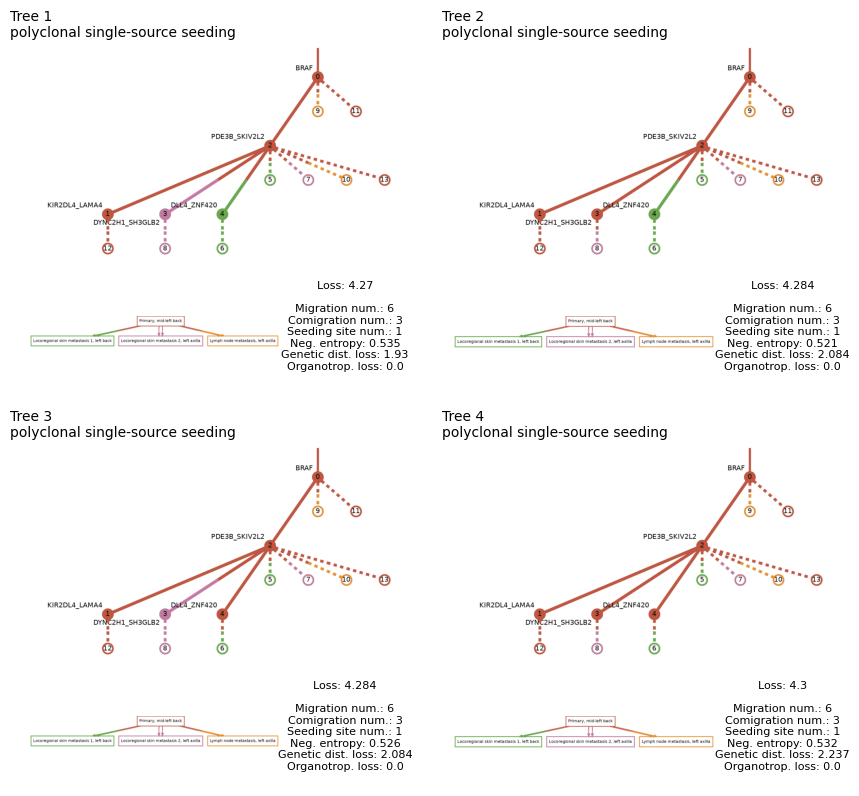

C_calibrate_Primary, right lower calf
6 unique trees were not found (5 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

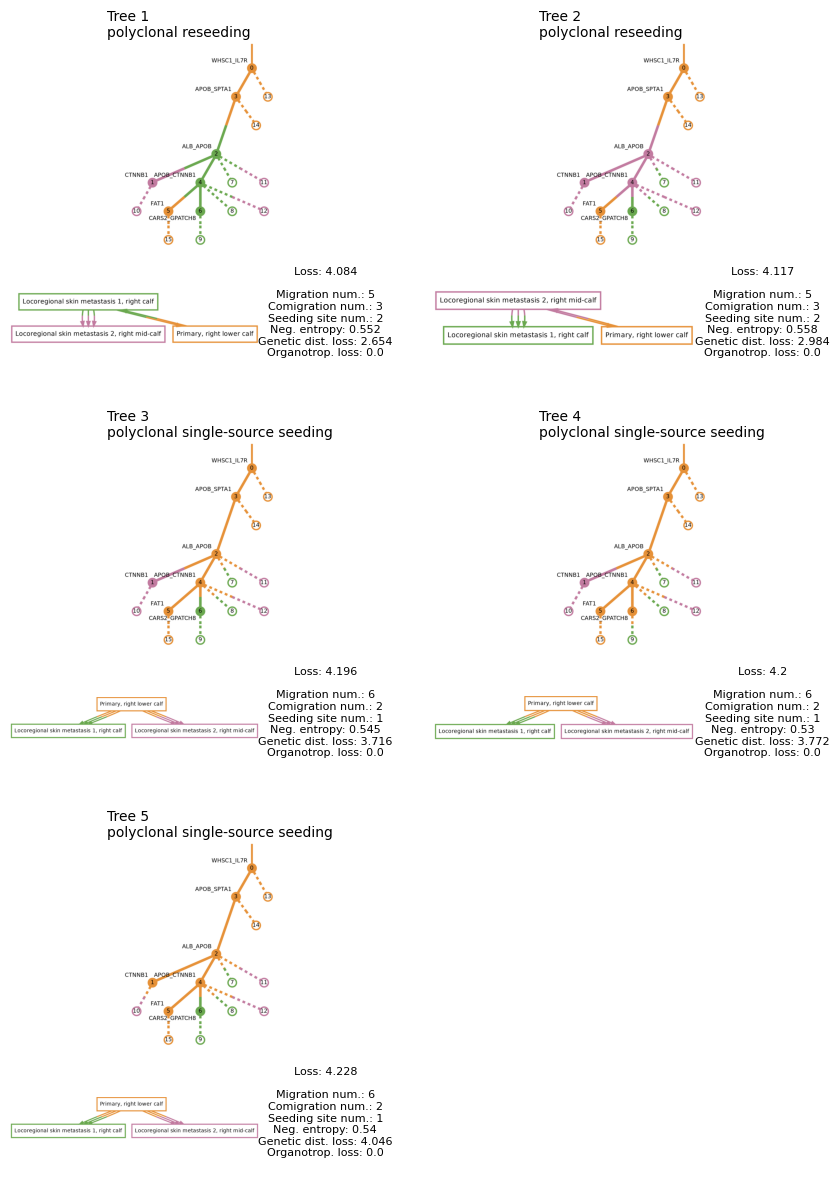

D_calibrate_Primary, right ankle
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

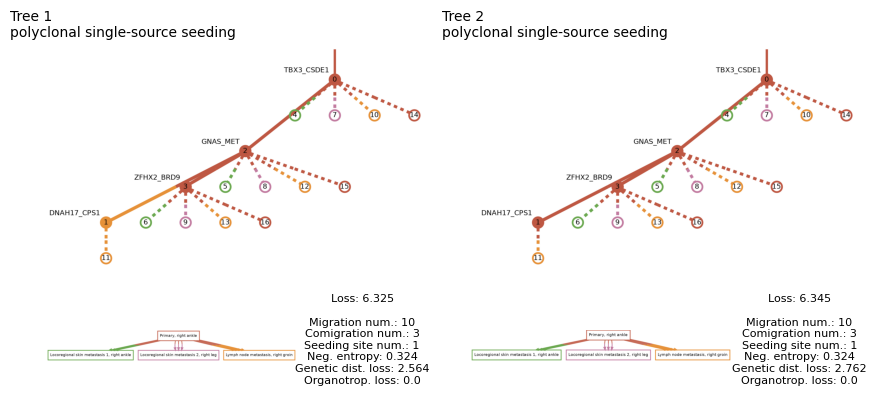

E_calibrate_Primary, left heel
6 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

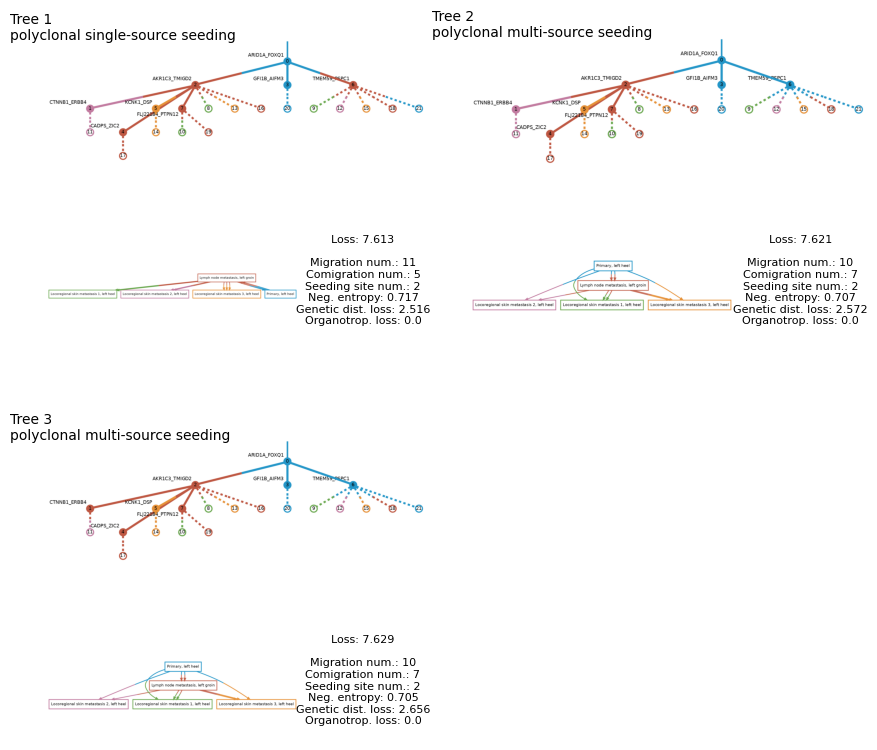

F_calibrate_Primary, left ear
6 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

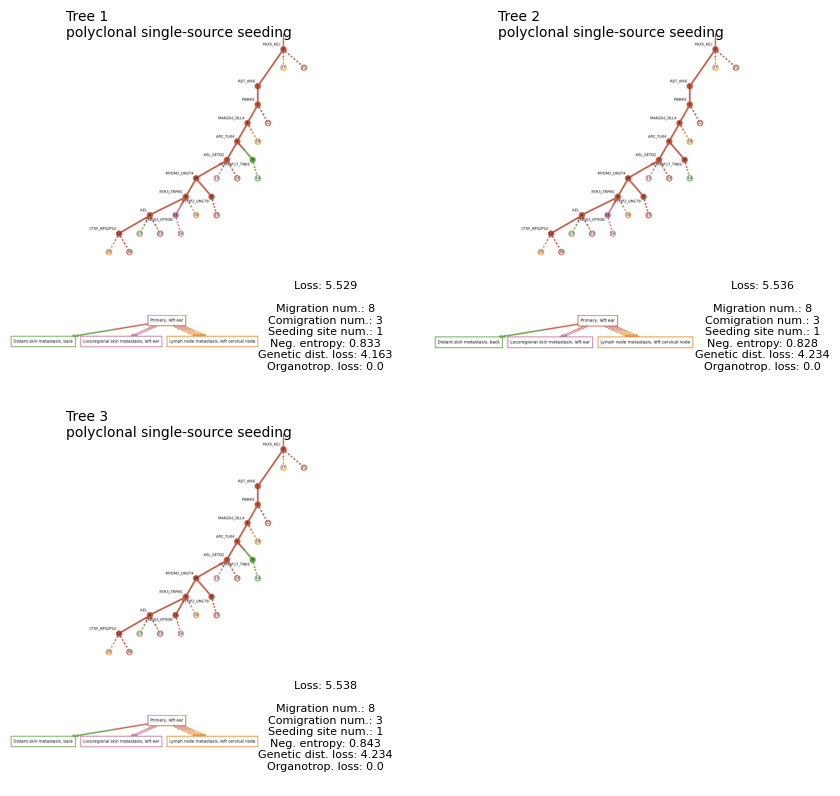

G_calibrate_Primary, right forearm
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

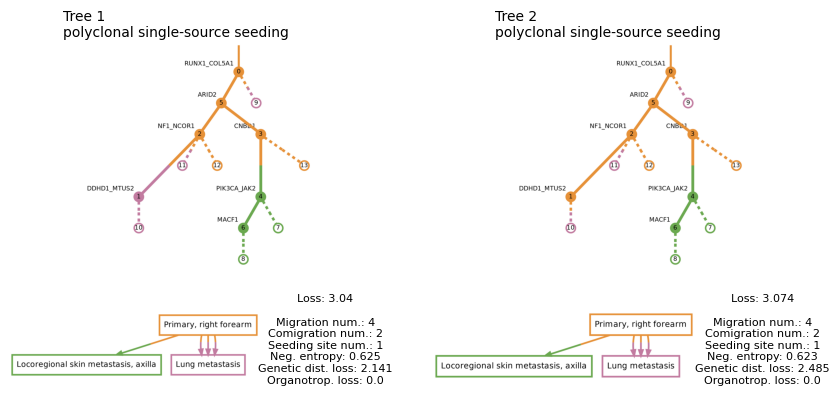

H_calibrate_Primary, right leg
6 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

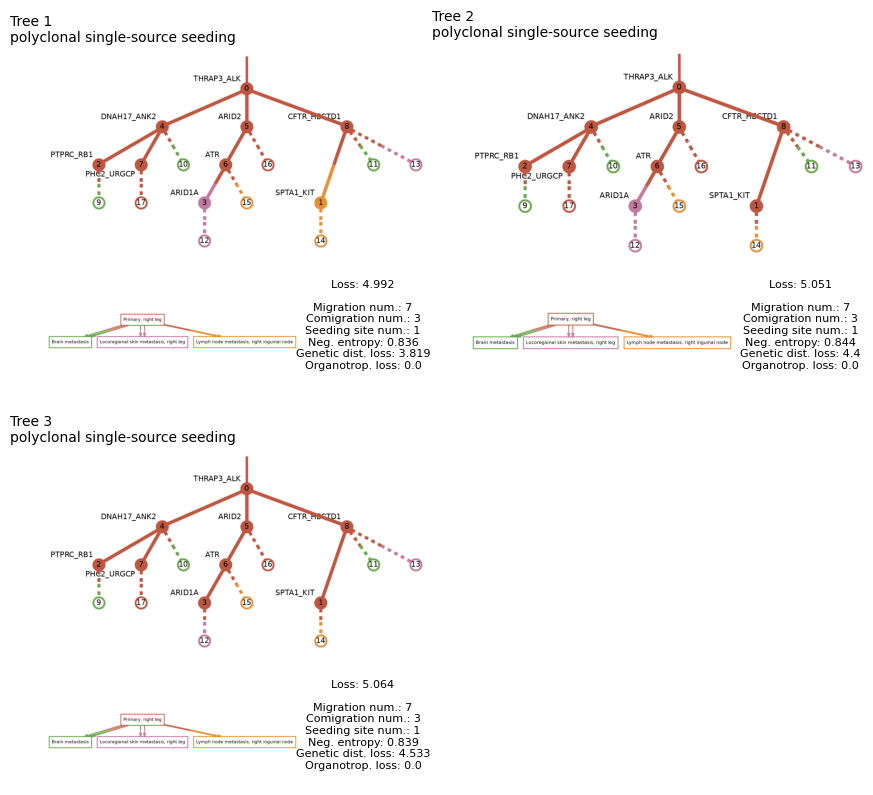

[0.503277599811554, 0.25342920422554016, 0.24329327046871185]

In [2]:
mut_trees_fns = [os.path.join(TREE_DIR, f"{patient_id}.results.npz") for patient_id in PATIENT_IDS]
trees = [data[0] for data in get_adj_matrices_from_pairtree_results(mut_trees_fns)]
ref_var_fns = [os.path.join(TSV_DIR, f"patient{patient_id}_clustered_SNVs.tsv") for patient_id in PATIENT_IDS]
run_names = [f"{pid}_calibrate" for pid in PATIENT_IDS]
calibrate(trees, ref_var_fns, print_config, OUTPUT_DIR, run_names, bias_weights=True, custom_colors=COLORS, solve_polytomies=False)


### Run all patients in evaluate mode

In [5]:
from metient.util import data_extraction_util as dutil

def run_evaluate(mut_trees_fn, ref_var_fn, weights, run_name):    
    trees = get_adj_matrices_from_pairtree_results(mut_trees_fn)
    print("num trees:", len(trees))
   
    tree_num = 1
    for adj_matrix in trees[:1]:
        print(f"\nTREE {tree_num}")
        print(adj_matrix.shape)

        evaluate(adj_matrix, ref_var_fn, weights, print_config, OUTPUT_DIR, f"{run_name}_tree{tree_num}",
                 O=None, bias_weights=True, custom_colors=COLORS, solve_polytomies=False)
        tree_num += 1
        

num trees: 1

TREE 1
torch.Size([7, 7])
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 144.77it/s]


# final solutions: 4


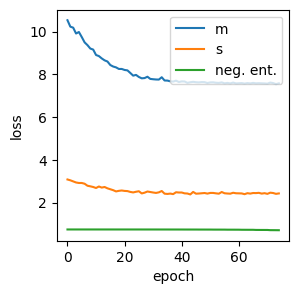

A_evaluate_tree1_Primary, forehead
6 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

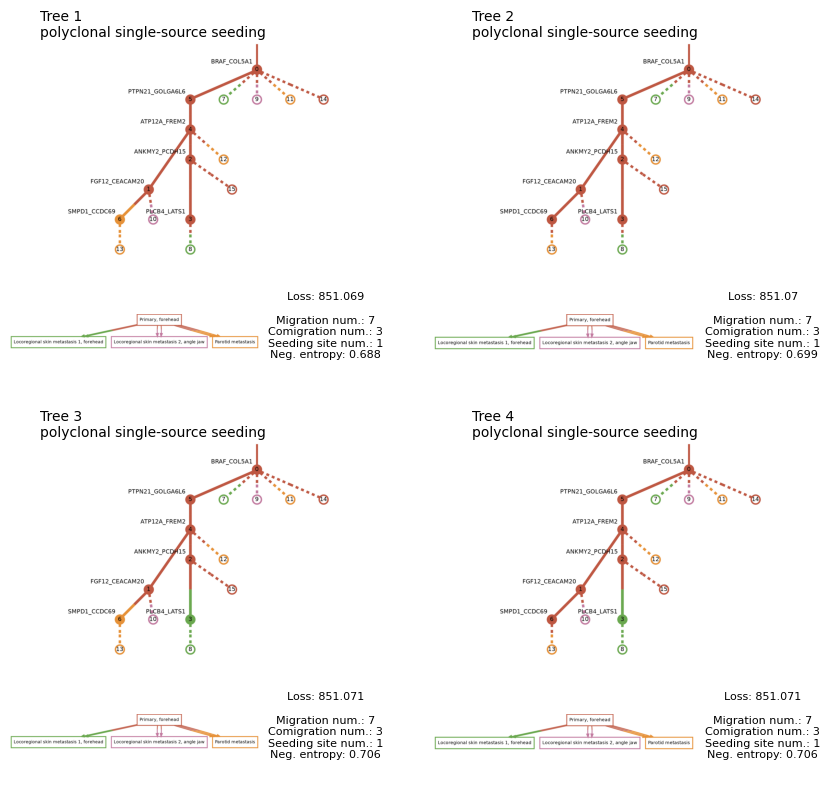

num trees: 1

TREE 1
torch.Size([5, 5])
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 136.55it/s]


# final solutions: 4


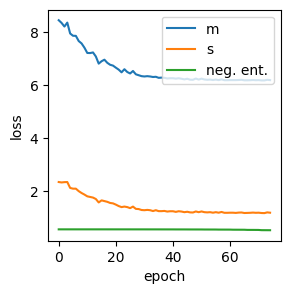

B_evaluate_tree1_Primary, mid-left back
6 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

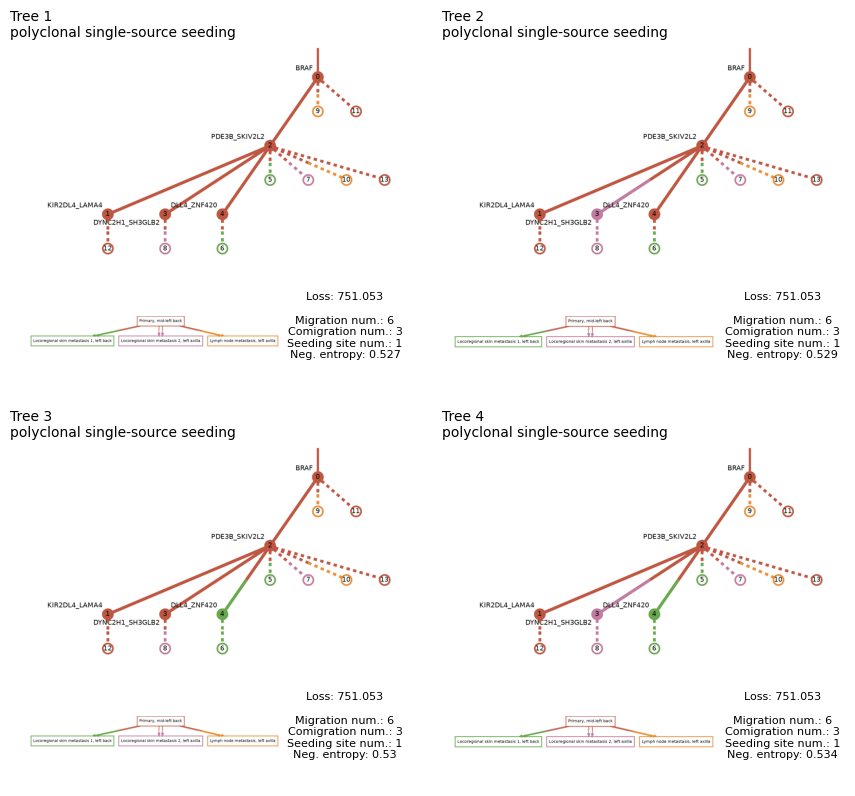

num trees: 1

TREE 1
torch.Size([7, 7])
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 214.51it/s]


# final solutions: 6


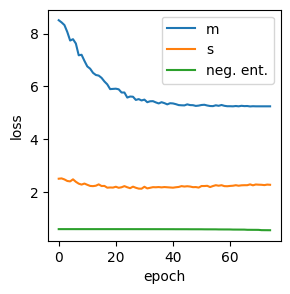

C_evaluate_tree1_Primary, right lower calf


<Figure size 300x300 with 0 Axes>

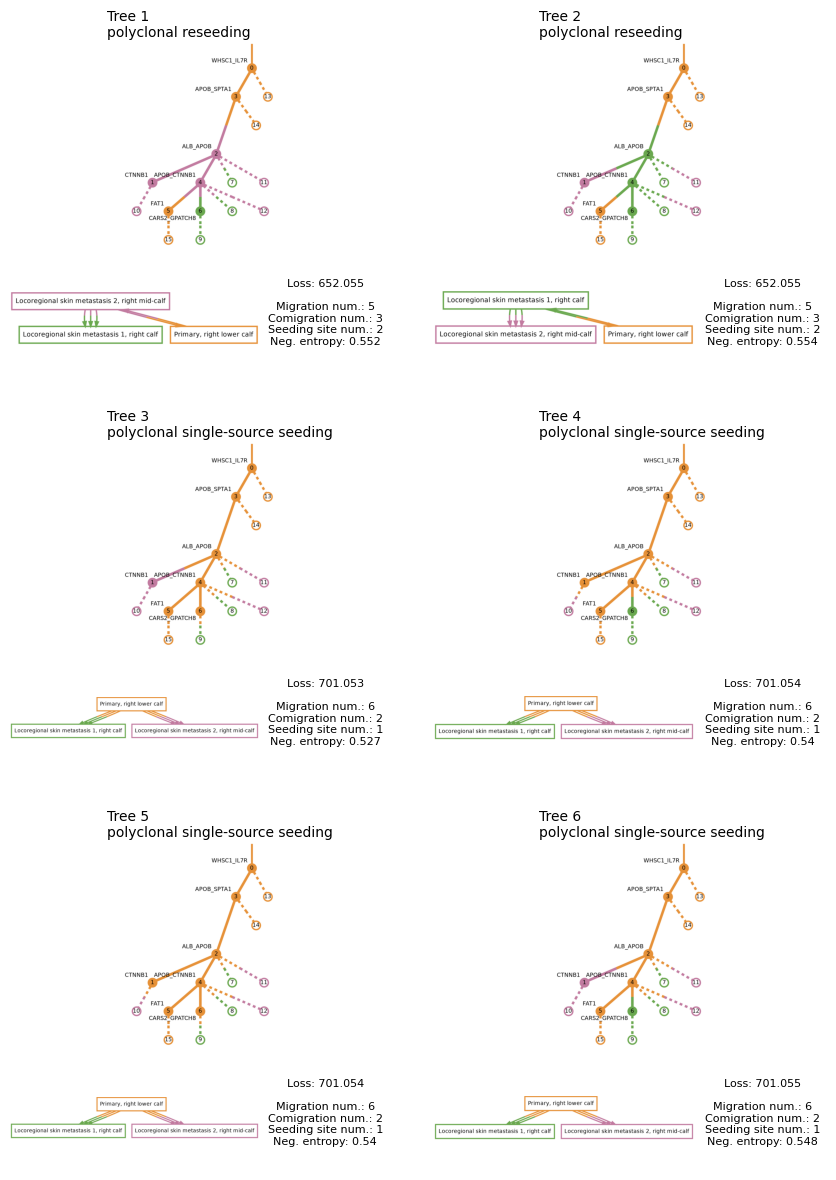

num trees: 1

TREE 1
torch.Size([4, 4])
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 212.97it/s]


# final solutions: 2


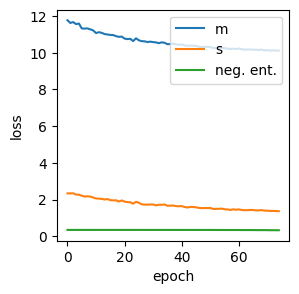

D_evaluate_tree1_Primary, right ankle
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

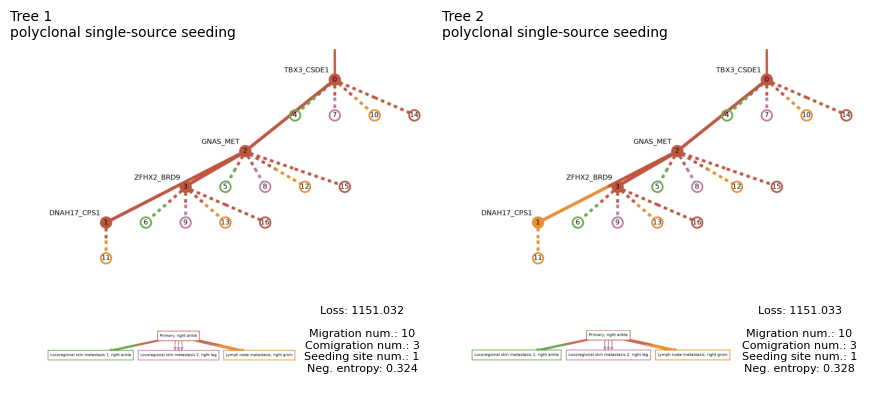

num trees: 1

TREE 1
torch.Size([8, 8])
Calculated batch size: 768
Restructuring adjacency matrix for E_evaluate_tree1_Primary, left heel since root node is not at index 0


100%|██████████| 75/75 [00:00<00:00, 117.72it/s]


# final solutions: 3


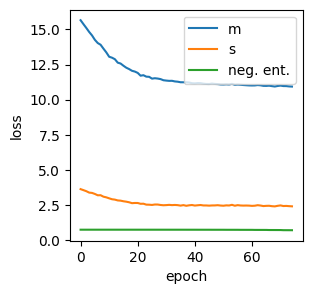

E_evaluate_tree1_Primary, left heel
6 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

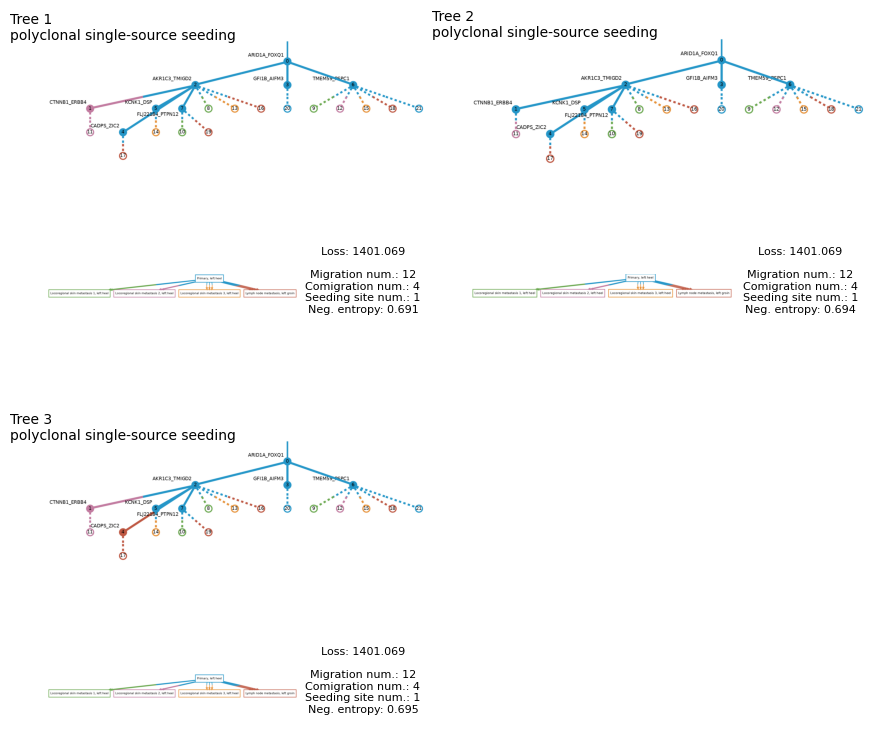

num trees: 1

TREE 1
torch.Size([13, 13])
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 186.17it/s]


# final solutions: 1


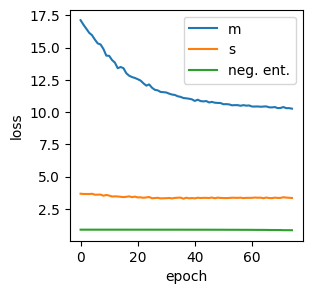

F_evaluate_tree1_Primary, left ear
6 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

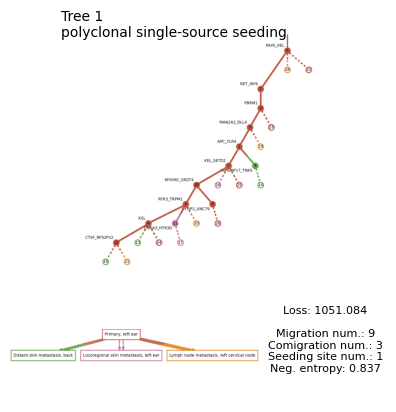

num trees: 1

TREE 1
torch.Size([7, 7])
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 174.94it/s]


# final solutions: 2


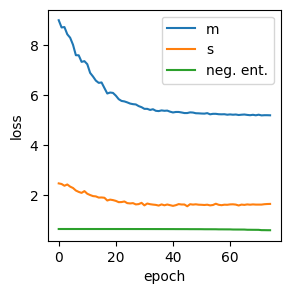

G_evaluate_tree1_Primary, right forearm
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

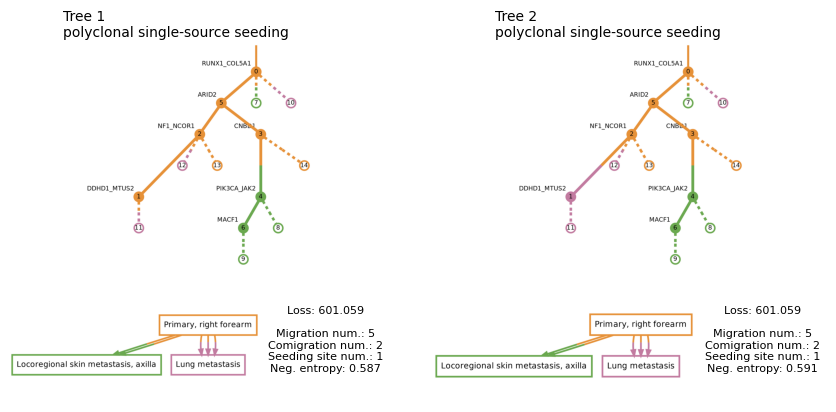

num trees: 1

TREE 1
torch.Size([9, 9])
Calculated batch size: 256


100%|██████████| 75/75 [00:00<00:00, 125.24it/s]


# final solutions: 2


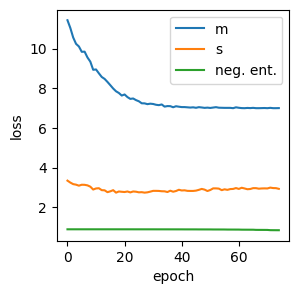

H_evaluate_tree1_Primary, right leg
6 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

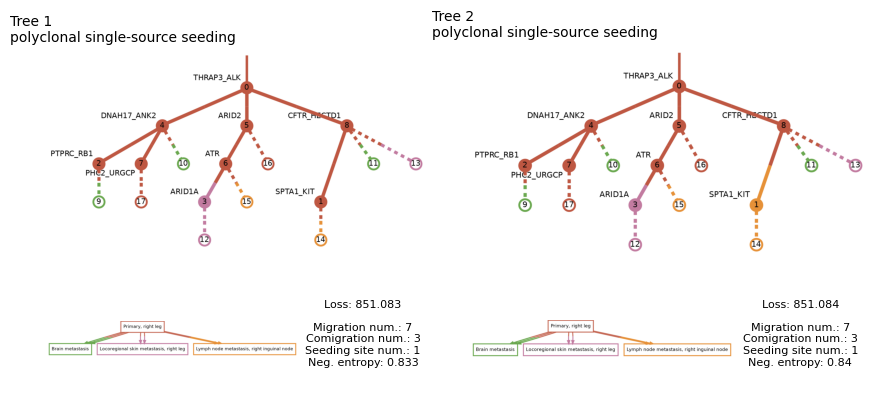

In [6]:
for patient_id in PATIENT_IDS:
    mut_trees_fn = os.path.join(TREE_DIR, f"{patient_id}.results.npz")
    ref_var_fn = os.path.join(TSV_DIR, f"patient{patient_id}_clustered_SNVs.tsv")
    weights = Weights(mig=100.0, comig=50.0, seed_site=1.0, gen_dist=0.0, organotrop=0.0)
    run_evaluate(mut_trees_fn, ref_var_fn, weights, f"{patient_id}_evaluate")
    